<a href="https://colab.research.google.com/github/Veny1302/Analisis-Sentimen-MBG/blob/main/SENTIMEN_ANALISIS_LSTM_MBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL DAN IMPORT

In [1]:
# Import required Python package
!pip install pandas
!pip install snscrape
!pip install transformers datasets scikit-learn torch
!pip install transformers
!pip install Sastrawi
!pip install deep_translator
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import torch
import joblib
import re
import pandas as pd
import string
import nltk
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from transformers.modeling_utils import PreTrainedModel
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, AutoConfig
from torch.nn import CrossEntropyLoss
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from deep_translator import GoogleTranslator

#LOAD DATASET

In [3]:
import pandas as pd

# Define the filename
filename = "mbg.csv"

# Specify the path to your CSV file
# Adjusting the path to where 'mbg.csv' is actually located.
file_path = f"/content/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

conversation_id_str                      created_at favorite_count  \
0      1885499666772668470  Sat Feb 01 01:25:26 +0000 2025             81   
1      1885500839802135012  Sat Feb 01 01:30:05 +0000 2025             41   
2      1885503549729300628  Sat Feb 01 01:40:51 +0000 2025              0   
3      1885507604560101457  Sat Feb 01 01:56:58 +0000 2025            207   
4      1885520165787623701  Sat Feb 01 02:46:53 +0000 2025            226   
...                    ...                             ...            ...   
22381  1991518585559400454  Thu Nov 20 14:46:46 +0000 2025              0   
22382  1991542780984992005  Thu Nov 20 16:22:54 +0000 2025              0   
22383  1991546899678261545  Thu Nov 20 16:39:17 +0000 2025              1   
22384  1991546899678261545  Thu Nov 20 16:40:37 +0000 2025              1   
22385  1991594595957043588  Thu Nov 20 19:48:48 +0000 2025              1   

                                               full_text               id_str  \
0      UMKM industri makanan dan minuman terutama yan...  1885499666772668470   
1      Program Makan Bergizi Gratis dongkrak ekonomi ...  1885500839802135012   
2      PLN sebagai BUMN terus mendukung penuh program...  1885503549729300628   
3      Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  1885507604560101457   
4      Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...  1885520165787623701   
...                                                  ...                  ...   
22381  Presiden RI Prabowo Subianto meminta penggunaa...  1991518585559400454   
22382  Menteri Perdagangan (Mendag) Budi Santoso mema...  1991542780984992005   
22383  Badan Gizi Nasional (BGN) menolak desakan untu...  1991546903725764815   
22384  namun lucunya disisi lain.. Wakil Ketua Dewan ...  1991547237042933761   
22385  Si BOTAK Memang seperti banyak AKAL Atau menga...  1991594595957043588   

                                               image_url  \
0        https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg   
1        https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg   
2        https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg   
3      https://pbs.twimg.com/ext_tw_video_thumb/18855...   
4                                                    NaN   
...                                                  ...   
22381                                                NaN   
22382                                                NaN   
22383                                                NaN   
22384                                                NaN   
22385    https://pbs.twimg.com/media/G6OQt1bacAY17JE.jpg   

      in_reply_to_screen_name lang  location quote_count  reply_count  \
0                         NaN   in       NaN           0          0.0   
1                         NaN   in       NaN           0          0.0   
2                         NaN   in       NaN           0          0.0   
3                         NaN   in       NaN           8        101.0   
4                         NaN   in       NaN          54        214.0   
...                       ...  ...       ...         ...          ...   
22381                     NaN   in       NaN           0          0.0   
22382                     NaN   in       NaN           0          0.0   
22383            percivalflec   in       NaN           0          2.0   
22384            percivalflec   in       NaN           0          1.0   
22385                     NaN   in       NaN           0          0.0   

       retweet_count                                          tweet_url  \
0                0.0  https://x.com/undefined/status/188549966677266...   
1                0.0  https://x.com/undefined/status/188550083980213...   
2                0.0  https://x.com/undefined/status/188550354972930...   
3               41.0  https://x.com/undefined/status/188550760456010...   
4               25.0  https://x.com/undefined/status/188552016578762...   
...              ...                                         

In [4]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 22386.


In [5]:
import pandas as pd
df = pd.read_csv("/content/mbg.csv")
df.head()

conversation_id_str                      created_at favorite_count  \
0  1885499666772668470  Sat Feb 01 01:25:26 +0000 2025             81   
1  1885500839802135012  Sat Feb 01 01:30:05 +0000 2025             41   
2  1885503549729300628  Sat Feb 01 01:40:51 +0000 2025              0   
3  1885507604560101457  Sat Feb 01 01:56:58 +0000 2025            207   
4  1885520165787623701  Sat Feb 01 02:46:53 +0000 2025            226   

                                           full_text               id_str  \
0  UMKM industri makanan dan minuman terutama yan...  1885499666772668470   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...  1885500839802135012   
2  PLN sebagai BUMN terus mendukung penuh program...  1885503549729300628   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  1885507604560101457   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...  1885520165787623701   

                                           image_url in_reply_to_screen_name  \
0    https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg                     NaN   
1    https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg                     NaN   
2    https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg                     NaN   
3  https://pbs.twimg.com/ext_tw_video_thumb/18855...                     NaN   
4                                                NaN                     NaN   

  lang  location quote_count  reply_count  retweet_count  \
0   in       NaN           0          0.0            0.0   
1   in       NaN           0          0.0            0.0   
2   in       NaN           0          0.0            0.0   
3   in       NaN           8        101.0           41.0   
4   in       NaN          54        214.0           25.0   

                                           tweet_url   user_id_str  username  
0  https://x.com/undefined/status/188549966677266...  2.654935e+08       NaN  
1  https://x.com/undefined/status/188550083980213...  2.986418e+08       NaN  
2  https://x.com/undefined/status/188550354972930...  1.769539e+18       NaN  
3  https://x.com/undefined/status/188550760456010...  1.102462e+18       NaN  
4  https://x.com/undefined/status/188552016578762...  1.712898e+07       NaN

#EDA

In [6]:
# Cek jumlah data dan kolom yang ada
df.shape

(22386, 15)

In [7]:
# Cek jumlah data yang didapatkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      22386 non-null  object 
 1   created_at               22386 non-null  object 
 2   favorite_count           22386 non-null  object 
 3   full_text                22385 non-null  object 
 4   id_str                   22385 non-null  object 
 5   image_url                16531 non-null  object 
 6   in_reply_to_screen_name  4023 non-null   object 
 7   lang                     22385 non-null  object 
 8   location                 1 non-null      float64
 9   quote_count              22385 non-null  object 
 10  reply_count              22385 non-null  float64
 11  retweet_count            22384 non-null  float64
 12  tweet_url                22384 non-null  object 
 13  user_id_str              22384 non-null  float64
 14  username              

In [8]:
# Cek missing value
print(df.isnull().sum())

conversation_id_str            0
created_at                     0
favorite_count                 0
full_text                      1
id_str                         1
image_url                   5855
in_reply_to_screen_name    18363
lang                           1
location                   22385
quote_count                    1
reply_count                    1
retweet_count                  2
tweet_url                      2
user_id_str                    2
username                   22386
dtype: int64


In [9]:
# Cek duplicate values kolom uniqueId dan text
print(df.duplicated(subset='id_str').sum())
print(df.duplicated(subset='full_text').sum())

4
51


In [10]:
import re
# Cek karakter unik pada kolom teks
def detect_URL(text):
    return bool(re.search(r'https?://\S+|www\.\S+', str(text)))

def detect_html(text):
    return bool(re.search(r'<.*?>', str(text)))

def detect_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U0001F004-\U0001F0CF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(str(text)))

def detect_symbol(text):
    return bool(re.search(r'[^a-zA-Z0-9\s]', str(text)))

def detect_number(text):
    return bool(re.search(r'\d', str(text)))

df['has_url'] = df['full_text'].apply(detect_URL)
df['has_html'] = df['full_text'].apply(detect_html)
df['has_emoji'] = df['full_text'].apply(detect_emoji)
df['has_symbol'] = df['full_text'].apply(detect_symbol)
df['has_number'] = df['full_text'].apply(detect_number)

In [11]:
print(df[['has_url', 'has_html', 'has_emoji', 'has_symbol', 'has_number']].sum())

has_url       19054
has_html          0
has_emoji       429
has_symbol    22165
has_number    17977
dtype: int64


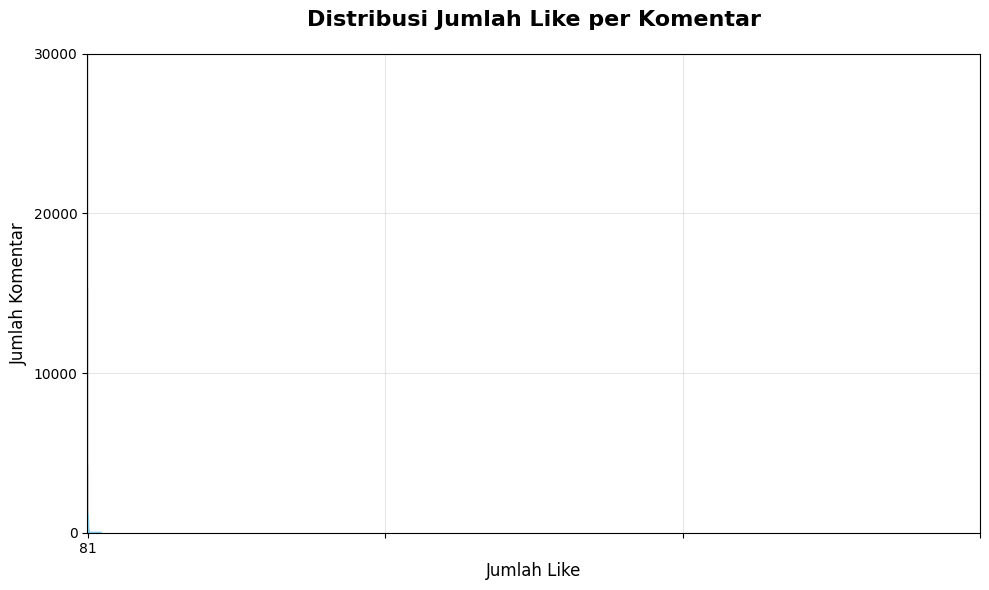

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

# Create figure dengan ukuran yang sesuai
plt.figure(figsize=(10, 6), facecolor='white') # Set facecolor to white

# Plot histogram dengan KDE
sns.histplot(data=df, x="favorite_count", bins=30, kde=True, color="skyblue", alpha=0.7)

# Customize plot
plt.title("Distribusi Jumlah Like per Komentar", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Jumlah Like", fontsize=12)
plt.ylabel("Jumlah Komentar", fontsize=12)

# Atur ticks pada sumbu x dan y sesuai dengan deskripsi
plt.xticks([0, 10000, 20000, 30000])
plt.yticks([0, 10000, 20000, 30000])

# Grid untuk memudahkan membaca nilai
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Tampilkan plot
plt.show()

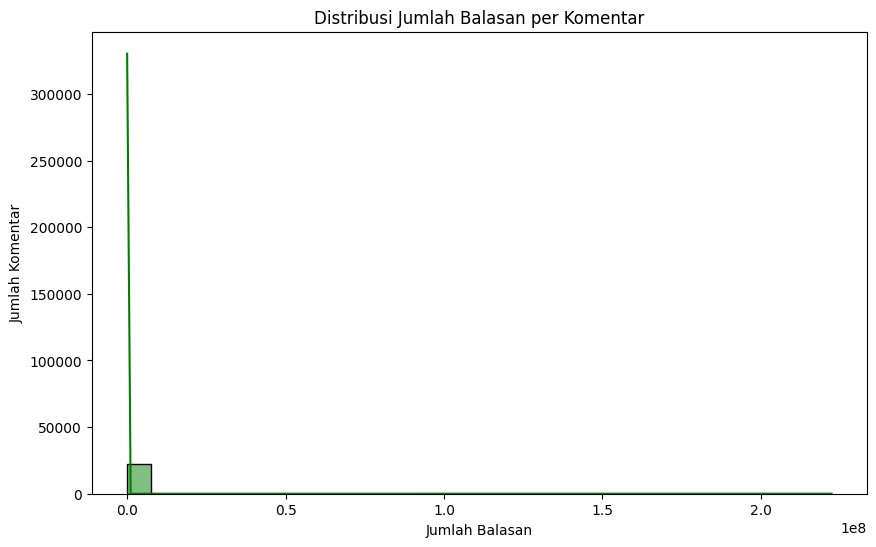

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["reply_count"], bins=30, kde=True, color="green")
plt.title("Distribusi Jumlah Balasan per Komentar")
plt.xlabel("Jumlah Balasan")
plt.ylabel("Jumlah Komentar")
plt.show()

In [14]:
df = pd.DataFrame(df[['full_text']])
df.head()

full_text
0  UMKM industri makanan dan minuman terutama yan...
1  Program Makan Bergizi Gratis dongkrak ekonomi ...
2  PLN sebagai BUMN terus mendukung penuh program...
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...

###WORDCLOUD SEBELUM PREPROCESSING




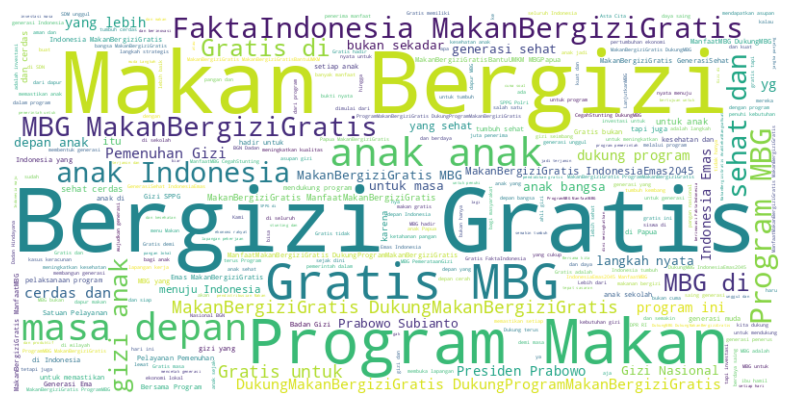

In [15]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['full_text']= df['full_text'].fillna('')

text = ''.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x'])

wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

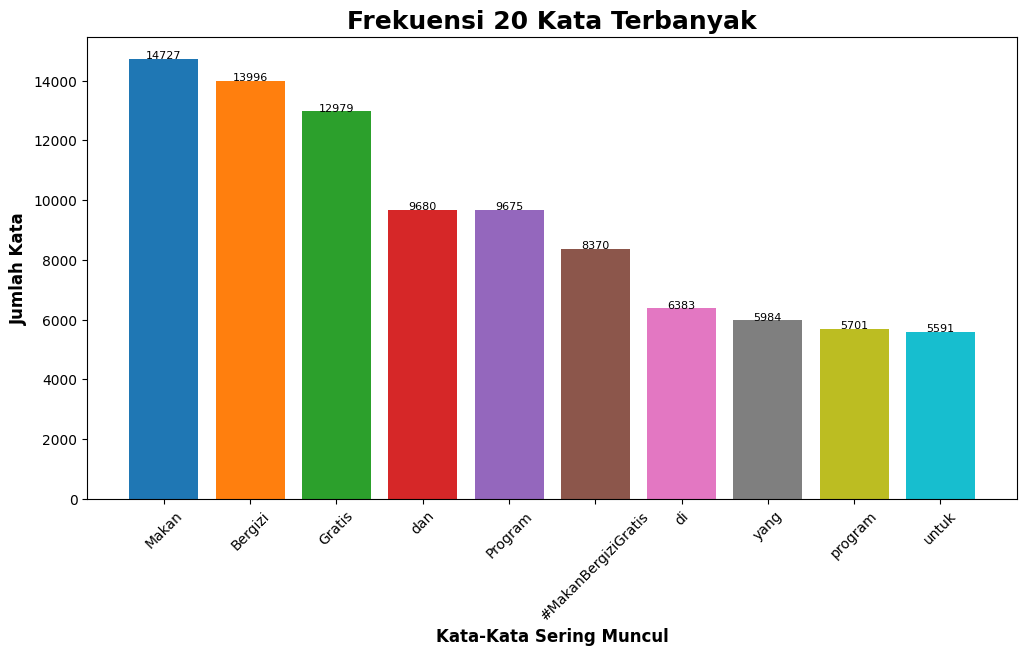

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata paling sering muncul
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi 20 Kata Terbanyak", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        num + 1,
        str(num),
        fontsize=8,
        color='black',
        ha='center'
    )

plt.show()


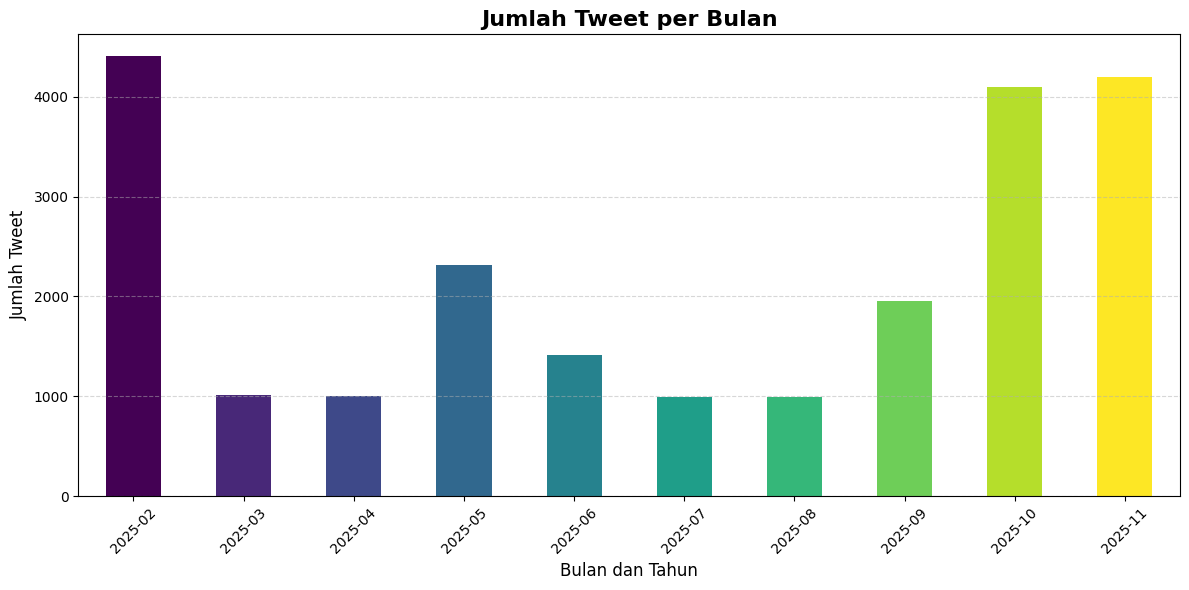

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load df and process it to ensure 'date' column is present
df = pd.read_csv("/content/mbg.csv")
df = df[['created_at', 'full_text', 'username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()

tweets = df.copy()

tweets['date'] = pd.to_datetime(
    tweets['date'],
    format='%a %b %d %H:%M:%S +0000 %Y',
    errors='coerce' # Handle parsing errors by coercing invalid dates to NaT
)

# Drop rows where 'date' could not be parsed (i.e., are NaT)
tweets.dropna(subset=['date'], inplace=True)

tweets['YearMonth'] = tweets['date'].dt.to_period('M')

monthly_tweets = tweets.groupby('YearMonth').size()

colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))

# Plot grafik
plt.figure(figsize=(12, 6))
monthly_tweets.plot(kind='bar', color=colors)

plt.xlabel("Bulan dan Tahun", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.title("Jumlah Tweet per Bulan", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
import csv
def export_to_csv(df, file_name='tweets-mbg'):
    if not df.empty:
        # Update fieldnames to match the current columns in df
        fieldnames = ['date', 'tweet']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for index, row in df.iterrows():
                writer.writerow({
                    'date': row['date'],
                    'tweet': row['tweet'],
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(df)

Data berhasil diekspor ke 'tweets-mbg'


In [19]:
data = pd.read_csv("/content/mbg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      22386 non-null  object 
 1   created_at               22386 non-null  object 
 2   favorite_count           22386 non-null  object 
 3   full_text                22385 non-null  object 
 4   id_str                   22385 non-null  object 
 5   image_url                16531 non-null  object 
 6   in_reply_to_screen_name  4023 non-null   object 
 7   lang                     22385 non-null  object 
 8   location                 1 non-null      float64
 9   quote_count              22385 non-null  object 
 10  reply_count              22385 non-null  float64
 11  retweet_count            22384 non-null  float64
 12  tweet_url                22384 non-null  object 
 13  user_id_str              22384 non-null  float64
 14  username              

In [20]:
data.head(5)

conversation_id_str                      created_at favorite_count  \
0  1885499666772668470  Sat Feb 01 01:25:26 +0000 2025             81   
1  1885500839802135012  Sat Feb 01 01:30:05 +0000 2025             41   
2  1885503549729300628  Sat Feb 01 01:40:51 +0000 2025              0   
3  1885507604560101457  Sat Feb 01 01:56:58 +0000 2025            207   
4  1885520165787623701  Sat Feb 01 02:46:53 +0000 2025            226   

                                           full_text               id_str  \
0  UMKM industri makanan dan minuman terutama yan...  1885499666772668470   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...  1885500839802135012   
2  PLN sebagai BUMN terus mendukung penuh program...  1885503549729300628   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  1885507604560101457   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...  1885520165787623701   

                                           image_url in_reply_to_screen_name  \
0    https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg                     NaN   
1    https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg                     NaN   
2    https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg                     NaN   
3  https://pbs.twimg.com/ext_tw_video_thumb/18855...                     NaN   
4                                                NaN                     NaN   

  lang  location quote_count  reply_count  retweet_count  \
0   in       NaN           0          0.0            0.0   
1   in       NaN           0          0.0            0.0   
2   in       NaN           0          0.0            0.0   
3   in       NaN           8        101.0           41.0   
4   in       NaN          54        214.0           25.0   

                                           tweet_url   user_id_str  username  
0  https://x.com/undefined/status/188549966677266...  2.654935e+08       NaN  
1  https://x.com/undefined/status/188550083980213...  2.986418e+08       NaN  
2  https://x.com/undefined/status/188550354972930...  1.769539e+18       NaN  
3  https://x.com/undefined/status/188550760456010...  1.102462e+18       NaN  
4  https://x.com/undefined/status/188552016578762...  1.712898e+07       NaN

#PREPROCESSING DATA

In [21]:
data = pd.read_csv("/content/tweets-mbg")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22386 non-null  object
 1   tweet   22385 non-null  object
dtypes: object(2)
memory usage: 349.9+ KB


In [22]:
data.head(10)

date  \
0  Sat Feb 01 01:25:26 +0000 2025   
1  Sat Feb 01 01:30:05 +0000 2025   
2  Sat Feb 01 01:40:51 +0000 2025   
3  Sat Feb 01 01:56:58 +0000 2025   
4  Sat Feb 01 02:46:53 +0000 2025   
5  Sat Feb 01 11:22:14 +0000 2025   
6  Sun Feb 02 06:44:29 +0000 2025   
7  Mon Feb 03 00:50:07 +0000 2025   
8  Mon Feb 03 03:55:59 +0000 2025   
9  Mon Feb 03 06:12:39 +0000 2025   

                                               tweet  
0  UMKM industri makanan dan minuman terutama yan...  
1  Program Makan Bergizi Gratis dongkrak ekonomi ...  
2  PLN sebagai BUMN terus mendukung penuh program...  
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...  
5  EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...  
6  Korupai Makan Bergizi Gratis Yang dikuatirkan ...  
7  @kumparan Program MBG itu potensi bocor besar....  
8  Pada hari senin 3 November 2025 Ratusan Siswa ...  
9  Pak @prabowo buat apa makan bergizi gratis di ...

In [23]:
df  = pd.DataFrame(data[['date','tweet']])
df.head(5)

date  \
0  Sat Feb 01 01:25:26 +0000 2025   
1  Sat Feb 01 01:30:05 +0000 2025   
2  Sat Feb 01 01:40:51 +0000 2025   
3  Sat Feb 01 01:56:58 +0000 2025   
4  Sat Feb 01 02:46:53 +0000 2025   

                                               tweet  
0  UMKM industri makanan dan minuman terutama yan...  
1  Program Makan Bergizi Gratis dongkrak ekonomi ...  
2  PLN sebagai BUMN terus mendukung penuh program...  
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...

##Hapus Duplikat Values

In [24]:
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)

In [25]:
df.shape

(22335, 2)

##Cleaning

In [26]:
import pandas as pd
import re

# Ensure 'tweet' and 'cleaning' columns exist in df
# If 'full_text' is present and 'tweet' is not, rename 'full_text' to 'tweet'
if 'full_text' in df.columns and 'tweet' not in df.columns:
    df = df.rename(columns={'full_text': 'tweet'})

# If 'tweet' is present and 'cleaning' is not, create the 'cleaning' column
if 'tweet' in df.columns and 'cleaning' not in df.columns:
    df['cleaning'] = df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|@\w+|#\w+|\d+|[.,!?:;"\'\`\]\[()]', '', str(x) if pd.notna(x) else ''))

df_cleaned_text = df[['tweet', 'cleaning']]
display(df_cleaned_text.head(10))

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   
5  EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...   
6  Korupai Makan Bergizi Gratis Yang dikuatirkan ...   
7  @kumparan Program MBG itu potensi bocor besar....   
8  Pada hari senin 3 November 2025 Ratusan Siswa ...   
9  Pak @prabowo buat apa makan bergizi gratis di ...   

                                            cleaning  
0  UMKM industri makanan dan minuman terutama yan...  
1  Program Makan Bergizi Gratis dongkrak ekonomi ...  
2  PLN sebagai BUMN terus mendukung penuh program...  
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...  
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...  
5  EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...  
6  Korupai Makan Bergizi Gratis Yang dikuatirkan ...  
7   Program MBG itu potensi bocor besar Lbh baik ...  
8  Pada hari senin  November  Ratusan Siswa yang ...  
9  Pak  buat apa makan bergizi gratis di sekolah ...

##Casefolding

In [27]:
df['case_folding'] = df['cleaning'].str.lower()
display(df[['tweet', 'cleaning', 'case_folding']].head())

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  
0  umkm industri makanan dan minuman terutama yan...  
1  program makan bergizi gratis dongkrak ekonomi ...  
2  pln sebagai bumn terus mendukung penuh program...  
3  opsi lain untuk lauk makan bergizi gratis ulat...  
4  hashim pede ekonomi tumbuh  persen berkat maka...

##Normalisasi Kata

In [28]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [29]:
data =  pd.DataFrame(df[['tweet','cleaning','case_folding',]])
data.head(5)

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  
0  umkm industri makanan dan minuman terutama yan...  
1  program makan bergizi gratis dongkrak ekonomi ...  
2  pln sebagai bumn terus mendukung penuh program...  
3  opsi lain untuk lauk makan bergizi gratis ulat...  
4  hashim pede ekonomi tumbuh  persen berkat maka...

In [30]:
kamus_data = pd.read_excel("/content/kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak baku'], kamus_data['baku']))

In [31]:
data['normalisasi'], data['Baku'], data['tidak baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df =  pd.DataFrame(data[['tweet','cleaning','case_folding','normalisasi']])

##Tokenize

In [32]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)


tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh  persen berkat maka...   

                                         normalisasi  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh persen berkat makan...   

                                            tokenize  
0  [umkm, industri, makanan, dan, minuman, teruta...  
1  [program, makan, bergizi, gratis, dongkrak, ek...  
2  [pln, sebagai, bumn, terus, mendukung, penuh, ...  
3  [opsi, lain, untuk, lauk, makan, bergizi, grat...  
4  [hashim, pede, ekonomi, tumbuh, persen, berkat...

##Stopword Removal

In [33]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh  persen berkat maka...   

                                         normalisasi  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh persen berkat makan...   

                                            tokenize  \
0  [umkm, industri, makanan, dan, minuman, teruta...   
1  [program, makan, bergizi, gratis, dongkrak, ek...   
2  [pln, sebagai, bumn, terus, mendukung, penuh, ...   
3  [opsi, lain, untuk, lauk, makan, bergizi, grat...   
4  [hashim, pede, ekonomi, tumbuh, persen, berkat...   

                                    stopword removal  
0  [umkm, industri, makanan, minuman, usahanya, l...  
1  [program, makan, bergizi, gratis, dongkrak, ek...  
2  [pln, bumn, mendukung, penuh, program, makan, ...  
3  [opsi, lauk, makan, bergizi, gratis, ulat, hon...  
4  [hashim, pede, ekonomi, tumbuh, persen, berkat...

##Stemming Data

In [36]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh  persen berkat maka...   

                                         normalisasi  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh persen berkat makan...   

                                            tokenize  \
0  [umkm, industri, makanan, dan, minuman, teruta...   
1  [program, makan, bergizi, gratis, dongkrak, ek...   
2  [pln, sebagai, bumn, terus, mendukung, penuh, ...   
3  [opsi, lain, untuk, lauk, makan, bergizi, grat...   
4  [hashim, pede, ekonomi, tumbuh, persen, berkat...   

                                    stopword removal  \
0  [umkm, industri, makanan, minuman, usahanya, l...   
1  [program, makan, bergizi, gratis, dongkrak, ek...   
2  [pln, bumn, mendukung, penuh, program, makan, ...   
3  [opsi, lauk, makan, bergizi, gratis, ulat, hon...   
4  [hashim, pede, ekonomi, tumbuh, persen, berkat...   

                                        steming_data  
0  umkm industri makan minum usaha lokasi sekolah...  
1  program makan gizi gratis dongkrak ekonomi lok...  
2  pln bumn dukung penuh program makan gizi grati...  
3  opsi lauk makan gizi gratis ulat hongkong maka...  
4  hashim pede ekonomi tumbuh persen berkat makan...


##Proses Hapus Data Bernilai Kosong (NAN)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22335 entries, 0 to 22385
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22335 non-null  object
 2   case_folding      22335 non-null  object
 3   normalisasi       22335 non-null  object
 4   tokenize          22335 non-null  object
 5   stopword removal  22335 non-null  object
 6   steming_data      22335 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [38]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22334 entries, 0 to 22385
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22334 non-null  object
 2   case_folding      22334 non-null  object
 3   normalisasi       22334 non-null  object
 4   tokenize          22334 non-null  object
 5   stopword removal  22334 non-null  object
 6   steming_data      22334 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


#WORDCLOUD SETELAH PREPROCESSING

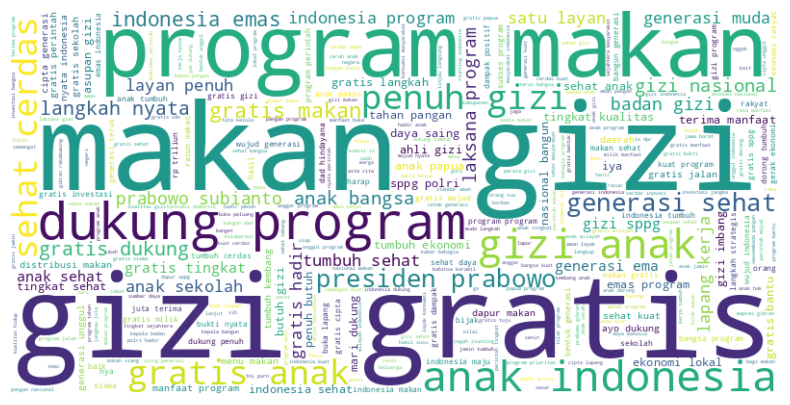

In [39]:
# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

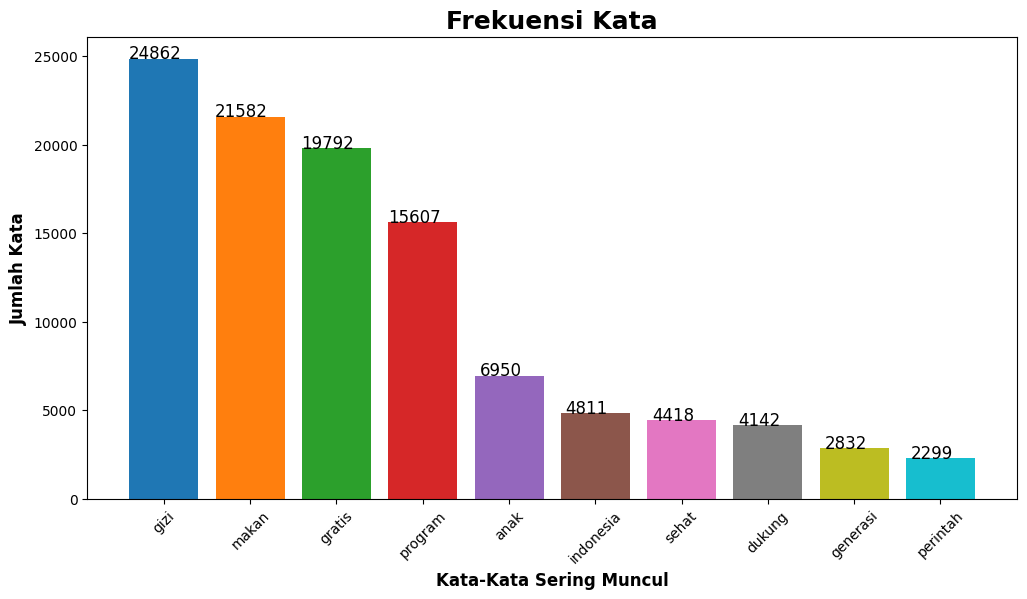

In [40]:
tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

In [41]:
df.to_csv('hasil_prepocessing.csv',encoding='utf8', index=False);

#LABELLING DATA DENGAN LEXICON BASED

In [42]:
data = pd.read_csv("/content/hasil_prepocessing.csv")
data.head(5)

tweet  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...   

                                            cleaning  \
0  UMKM industri makanan dan minuman terutama yan...   
1  Program Makan Bergizi Gratis dongkrak ekonomi ...   
2  PLN sebagai BUMN terus mendukung penuh program...   
3  Opsi lain untuk lauk Makan Bergizi Gratis Ulat...   
4  Hashim Pede Ekonomi Tumbuh  Persen Berkat Maka...   

                                        case_folding  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh  persen berkat maka...   

                                         normalisasi  \
0  umkm industri makanan dan minuman terutama yan...   
1  program makan bergizi gratis dongkrak ekonomi ...   
2  pln sebagai bumn terus mendukung penuh program...   
3  opsi lain untuk lauk makan bergizi gratis ulat...   
4  hashim pede ekonomi tumbuh persen berkat makan...   

                                            tokenize  \
0  ['umkm', 'industri', 'makanan', 'dan', 'minuma...   
1  ['program', 'makan', 'bergizi', 'gratis', 'don...   
2  ['pln', 'sebagai', 'bumn', 'terus', 'mendukung...   
3  ['opsi', 'lain', 'untuk', 'lauk', 'makan', 'be...   
4  ['hashim', 'pede', 'ekonomi', 'tumbuh', 'perse...   

                                    stopword removal  \
0  ['umkm', 'industri', 'makanan', 'minuman', 'us...   
1  ['program', 'makan', 'bergizi', 'gratis', 'don...   
2  ['pln', 'bumn', 'mendukung', 'penuh', 'program...   
3  ['opsi', 'lauk', 'makan', 'bergizi', 'gratis',...   
4  ['hashim', 'pede', 'ekonomi', 'tumbuh', 'perse...   

                                        steming_data  
0  umkm industri makan minum usaha lokasi sekolah...  
1  program makan gizi gratis dongkrak ekonomi lok...  
2  pln bumn dukung penuh program makan gizi grati...  
3  opsi lauk makan gizi gratis ulat hongkong maka...  
4  hashim pede ekonomi tumbuh persen berkat makan...

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22335 entries, 0 to 22334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22334 non-null  object
 2   case_folding      22334 non-null  object
 3   normalisasi       22334 non-null  object
 4   tokenize          22335 non-null  object
 5   stopword removal  22335 non-null  object
 6   steming_data      22332 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [44]:
df = data.dropna()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22332 entries, 0 to 22334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22332 non-null  object
 1   cleaning          22332 non-null  object
 2   case_folding      22332 non-null  object
 3   normalisasi       22332 non-null  object
 4   tokenize          22332 non-null  object
 5   stopword removal  22332 non-null  object
 6   steming_data      22332 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [46]:
data = pd.DataFrame(data[['steming_data']])
data.head()

steming_data
0  umkm industri makan minum usaha lokasi sekolah...
1  program makan gizi gratis dongkrak ekonomi lok...
2  pln bumn dukung penuh program makan gizi grati...
3  opsi lauk makan gizi gratis ulat hongkong maka...
4  hashim pede ekonomi tumbuh persen berkat makan...

In [47]:
import pandas as pd
import requests

# ===============================
# 1. Unduh kamus positif & negatif InSet dari GitHub
# ===============================
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# ===============================
# 2. Fungsi untuk menentukan sentimen dan menghitung skor
# ===============================
def determine_sentiment(text):
    if isinstance(text, str):

        # Hitung jumlah kata positif & negatif
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)

        # Skor sentimen
        sentiment_score = positive_count - negative_count

        # Tentukan label sentimen
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment

    return 0, "Netral"

# Apply the function to the 'stemming_data' column
data[['sentiment_score', 'sentiment_label']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
display(data.head())

steming_data  sentiment_score  \
0  umkm industri makan minum usaha lokasi sekolah...                2   
1  program makan gizi gratis dongkrak ekonomi lok...                1   
2  pln bumn dukung penuh program makan gizi grati...                1   
3  opsi lauk makan gizi gratis ulat hongkong maka...                2   
4  hashim pede ekonomi tumbuh persen berkat makan...                3   

  sentiment_label  
0         Positif  
1         Positif  
2         Positif  
3         Positif  
4         Positif

In [48]:
# Check the distribution of sentiment labels for the entire DataFrame
sentiment_distribution = data['sentiment_label'].value_counts()
display(sentiment_distribution)

sentiment_label
Positif    15036
Netral      3968
Negatif     3331
Name: count, dtype: int64

/tmp/ipython-input-3972476278.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


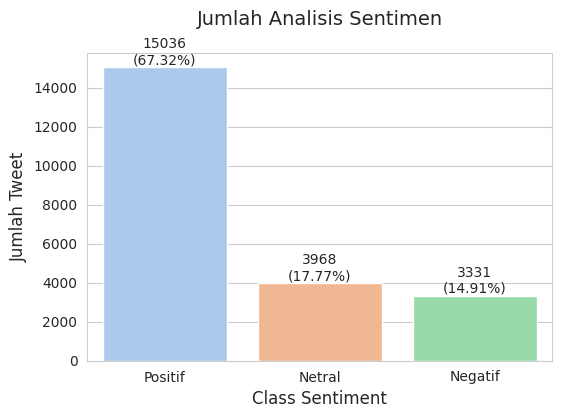

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')

plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{(100 * count / total):.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

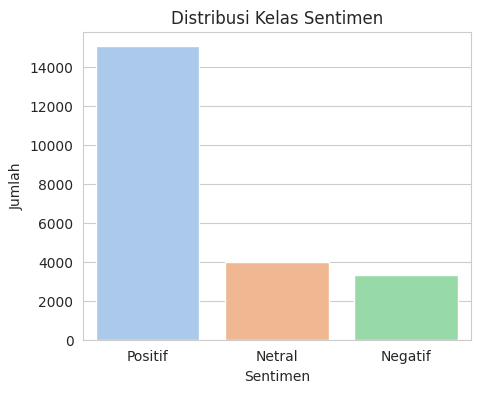

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(
    data=data, # Changed from df_label to data
    x="sentiment_label", # Changed from "Sentiment" to "sentiment_label"
    hue="sentiment_label", # Changed from "Sentiment" to "sentiment_label"
    palette="pastel"
)
plt.title("Distribusi Kelas Sentimen")
plt.ylabel("Jumlah")
plt.xlabel("Sentimen")
plt.show()

In [51]:
data.to_csv('hasil_labeling.csv', index=False)

In [52]:
data = pd.read_csv("/content/hasil_labeling.csv")

data = data.rename(columns={'sentiment_label': 'sentiment_label'})

# Bersihkan ;;; dari ISI DATA kolom Sentiment
data['sentiment_label'] = data['sentiment_label'].str.replace(';+', '', regex=True)
data.head(10)

steming_data  sentiment_score  \
0  umkm industri makan minum usaha lokasi sekolah...                2   
1  program makan gizi gratis dongkrak ekonomi lok...                1   
2  pln bumn dukung penuh program makan gizi grati...                1   
3  opsi lauk makan gizi gratis ulat hongkong maka...                2   
4  hashim pede ekonomi tumbuh persen berkat makan...                3   
5  ekonomi maju program makan gizi gratis cam sri...                2   
6  korupai makan gizi gratis dikuatirkan netizen ...                0   
7  program potensi bocor stabil harga mudah akses...                4   
8  senin november ratus siswa gabung aliansi ajar...                2   
9  makan gizi gratis sekolah anak makan malam ora...                1   

  sentiment_label  
0         Positif  
1         Positif  
2         Positif  
3         Positif  
4         Positif  
5         Positif  
6          Netral  
7         Positif  
8         Positif  
9         Positif

/tmp/ipython-input-3438688155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


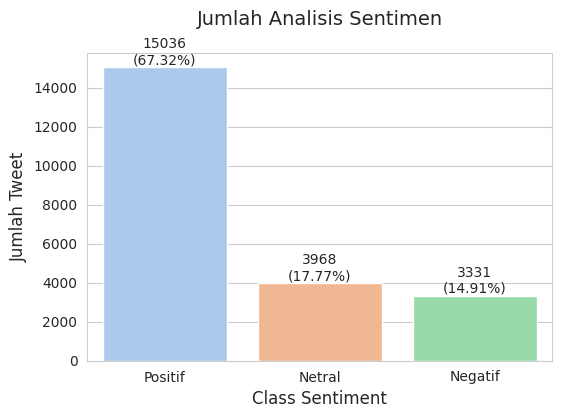

In [53]:
sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [54]:
sentimen_negatif = data[data['sentiment_label'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment_label'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['sentiment_label'] == 'Netral']['steming_data'].str.cat(sep=' ')

In [55]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image # Import Image from PIL

# Explicitly load the data_labeling.xlsx to ensure 'data' DataFrame has 'sentiment_label'
data = pd.read_csv('/content/hasil_labeling.csv')

# Load the Twitter logo as a mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))

# Define the generate_wordCloud function (copied from previous cells to make this cell self-contained)
def generate_wordCloud(text_data, title, mask=None):
    stopwords = set(STOPWORDS)
    stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x', 'fyp', 'lu', 'yg'])

    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color="white",
        max_words=500,
        width=800,
        height=400,
        mask=mask
    ).generate(text_data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

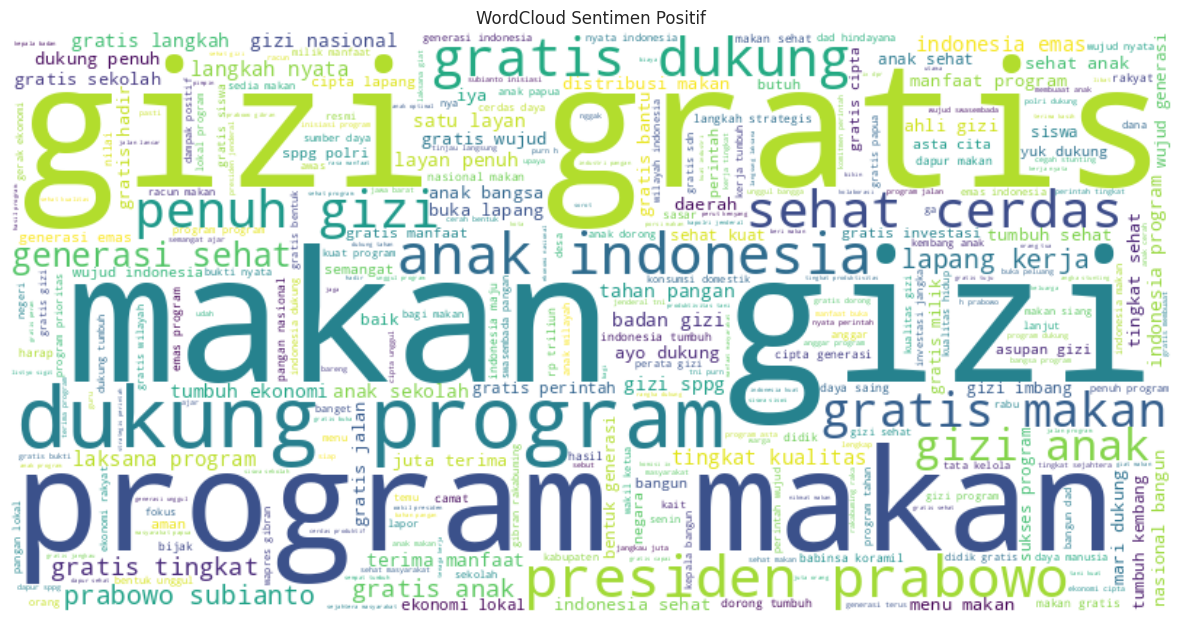

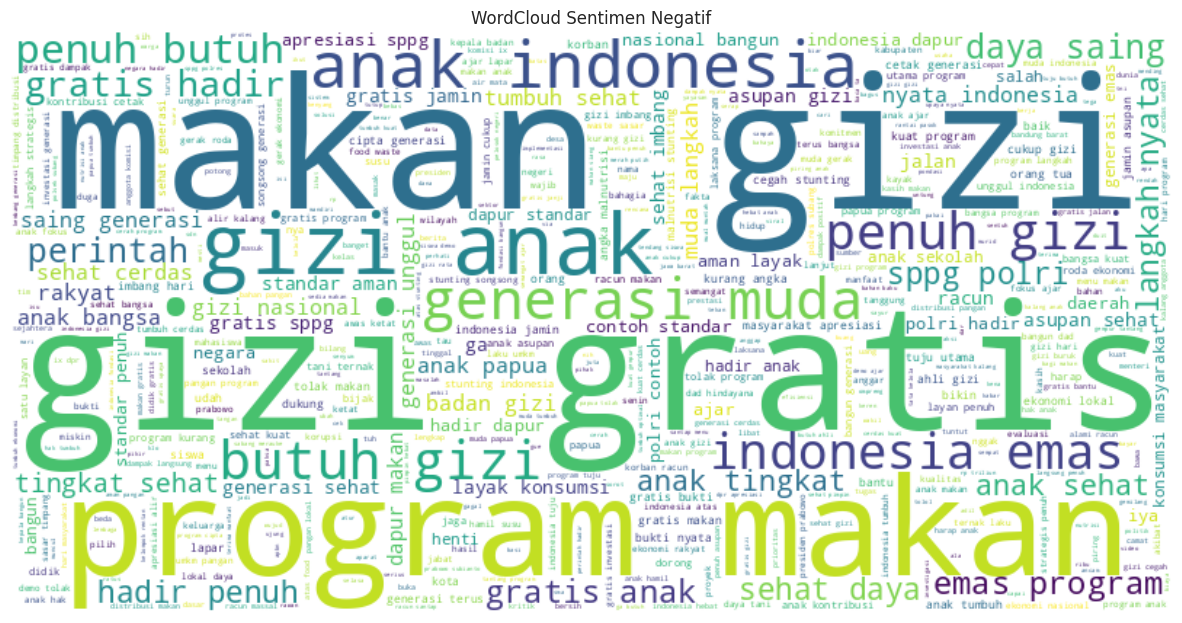

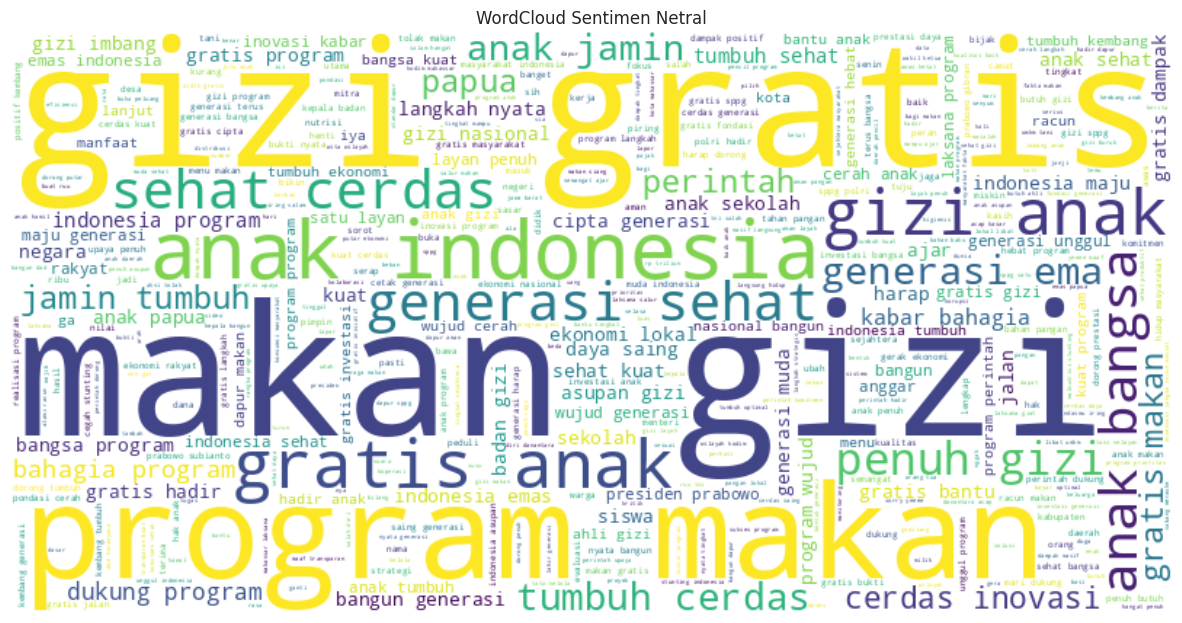

In [56]:

# Membuat WordCloud untuk sentimen positif
generate_wordCloud(sentimen_positif, 'WordCloud Sentimen Positif')
# Membuat WordCloud untuk sentimen negatif
generate_wordCloud(sentimen_negatif, 'WordCloud Sentimen Negatif')
# Membuat Wordcloud Netral
generate_wordCloud(sentimen_netral, 'WordCloud Sentimen Netral')

#Label Encoder

In [57]:
labels = data['sentiment_label'].unique().tolist()
#labels.append(4)
labels

['Positif', 'Netral', 'Negatif']

##Spliting Data

In [58]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data['sentiment_label']  # WAJIB biar seimbang
)

print("Train size:", df_train.shape)
print("Test size :", df_test.shape)


Train size: (17868, 3)
Test size : (4467, 3)


In [62]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': df_train['steming_data'], 'sentiment_label': df_train['sentiment_label']})
train_set.to_csv('/content/train_data.csv', index=False)

# Simpan data uji ke file
test_set = pd.DataFrame({'text': df_test['steming_data'], 'sentiment': df_test['sentiment_label']})
test_set.to_csv('/content/test_data.csv', index=False)

print("Data latih dan uji berhasil disimpan.")

Data latih dan uji berhasil disimpan.


In [64]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {df_train.shape[0]}')
print(f'Jumlah Data Uji: {df_test.shape[0]}')

Jumlah Data Latih: 17868
Jumlah Data Uji: 4467


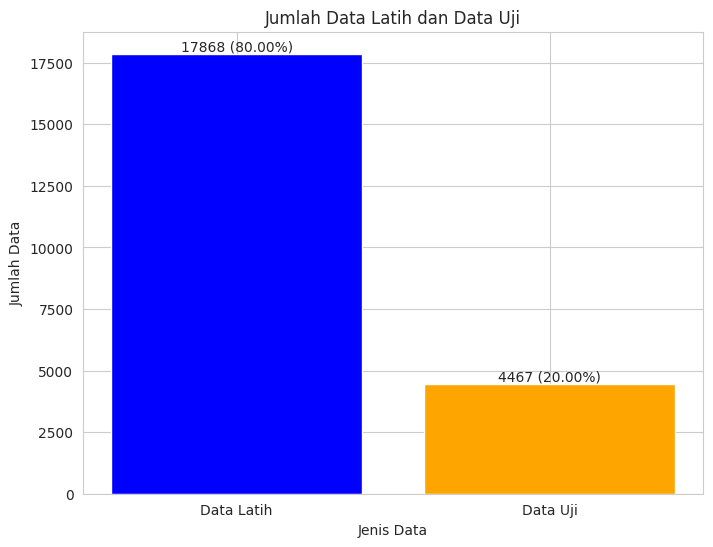

In [66]:
# Jumlah data latih dan data uji
train_size =df_train.shape[0]
test_size = df_test.shape[0]

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

##Input Sequence

In [67]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout
)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

SEQUENCE_LENGTH = 100 # Define SEQUENCE_LENGTH for padding

# Ensure the 'steming_data' columns are string type and fill any potential NaN values
# This converts any NaN (which is float type) to an empty string, preventing the AttributeError.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['steming_data'].astype(str).fillna(''))

X_train_seq = tokenizer.texts_to_sequences(df_train['steming_data'].astype(str).fillna(''))
X_test_seq  = tokenizer.texts_to_sequences(df_test['steming_data'].astype(str).fillna(''))

X_train_pad = pad_sequences(
    X_train_seq,
    maxlen=SEQUENCE_LENGTH,
    padding='post'
)

X_test_pad = pad_sequences(
    X_test_seq,
    maxlen=SEQUENCE_LENGTH,
    padding='post'
)

##Encoding Label 3 Kelas

In [70]:
from tensorflow.keras.utils import to_categorical

label_map = {
    "Negatif": 0,
    "Netral": 1,
    "Positif": 2
}

y_train = df_train['sentiment_label'].map(label_map)
y_test  = df_test['sentiment_label'].map(label_map)

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat  = to_categorical(y_test, num_classes=3)



##Embeding Layer

In [78]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)


Vocab size: 10799


##Callback

In [80]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5, mode='max')]

##Evaluasi Model

##Perbandingan LSTM vs Naive Bayes vs SVM

In [81]:
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# DL
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns


#Load dan Split Data

In [82]:
df = data.copy()  # atau df = pd.read_csv("data.csv")

X = df['steming_data'].astype(str)
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.value_counts())


sentiment_label
Positif    12029
Netral      3174
Negatif     2665
Name: count, dtype: int64


#TF-IDF (NB &SVM)

In [83]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


#NAIVE BAYES

In [84]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7156928587418849
              precision    recall  f1-score   support

     Negatif       0.84      0.24      0.37       666
      Netral       0.58      0.09      0.15       794
     Positif       0.71      0.99      0.83      3007

    accuracy                           0.72      4467
   macro avg       0.71      0.44      0.45      4467
weighted avg       0.71      0.72      0.64      4467



#SVM

In [85]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8938885157824042
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       666
      Netral       0.82      0.59      0.68       794
     Positif       0.92      0.98      0.95      3007

    accuracy                           0.89      4467
   macro avg       0.86      0.81      0.83      4467
weighted avg       0.89      0.89      0.89      4467



#PREPARASI LABEL UNTUK LSTM

In [86]:
label_map = {'Negatif':0, 'Netral':1, 'Positif':2}

y_train_enc = y_train.map(label_map)
y_test_enc  = y_test.map(label_map)

y_train_cat = to_categorical(y_train_enc, num_classes=3)
y_test_cat  = to_categorical(y_test_enc, num_classes=3)


#TOKENISASI & PADDING (LSTM)

In [87]:
SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=SEQUENCE_LENGTH)
X_test_pad  = pad_sequences(X_test_seq, maxlen=SEQUENCE_LENGTH)

vocab_size = len(tokenizer.word_index) + 1


#Model LSTM

In [88]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=SEQUENCE_LENGTH),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#Train LSTM

In [89]:
history = model.fit(
    X_train_pad,
    y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(X_test_pad, y_test_cat),
    verbose=1
)


Epoch 1/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 136s 446ms/step - accuracy: 0.7309 - loss: 0.6970 - val_accuracy: 0.8957 - val_loss: 0.3133
Epoch 2/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 122s 376ms/step - accuracy: 0.9173 - loss: 0.2344 - val_accuracy: 0.9185 - val_loss: 0.2395
Epoch 3/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 104s 373ms/step - accuracy: 0.9516 - loss: 0.1351 - val_accuracy: 0.9286 - val_loss: 0.2309
Epoch 4/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 104s 371ms/step - accuracy: 0.9704 - loss: 0.0905 - val_accuracy: 0.9346 - val_loss: 0.2201
Epoch 5/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 104s 372ms/step - accuracy: 0.9752 - loss: 0.0786 - val_accuracy: 0.9288 - val_loss: 0.2572
Epoch 6/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 108s 385ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.9353 - val_loss: 0.2439
Epoch 7/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 108s 387ms/step - accuracy: 0.9833 - loss: 0.0536 - val_accuracy: 0.9315 - val_loss: 0.2668
Epoch 8/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 108s 386ms/step - accuracy: 0.9879 -

#Evaluasi LSTM

In [90]:
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm_label = np.argmax(y_pred_lstm, axis=1)

y_test_label = np.argmax(y_test_cat, axis=1)

print("LSTM Accuracy:", accuracy_score(y_test_label, y_pred_lstm_label))
print(classification_report(
    y_test_label,
    y_pred_lstm_label,
    target_names=['Negatif','Netral','Positif']
))


140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step
LSTM Accuracy: 0.9393328856055518
              precision    recall  f1-score   support

     Negatif       0.94      0.87      0.90       666
      Netral       0.84      0.86      0.85       794
     Positif       0.96      0.98      0.97      3007

    accuracy                           0.94      4467
   macro avg       0.92      0.90      0.91      4467
weighted avg       0.94      0.94      0.94      4467



#Visualisasi Akurasi & Loss

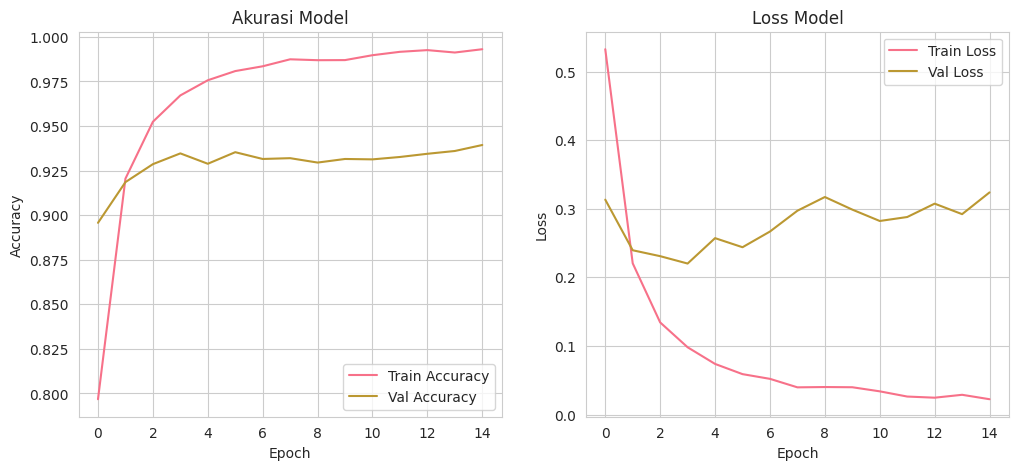

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


#CONFUSION MATRIX (LSTM)

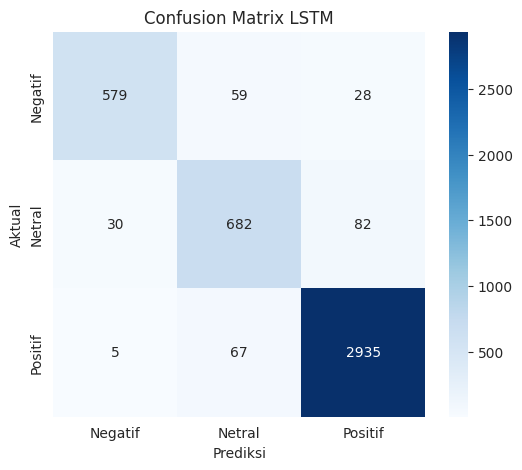

In [92]:
cm = confusion_matrix(y_test_label, y_pred_lstm_label)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negatif','Netral','Positif'],
    yticklabels=['Negatif','Netral','Positif']
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix LSTM")
plt.show()


#PERBANDINGAN

In [93]:
print("NB Accuracy :", accuracy_score(y_test, y_pred_nb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("LSTM Accuracy:", accuracy_score(y_test_label, y_pred_lstm_label))


NB Accuracy : 0.7156928587418849
SVM Accuracy: 0.8938885157824042
LSTM Accuracy: 0.9393328856055518


In [94]:
acc_nb   = accuracy_score(y_test, y_pred_nb)
acc_svm  = accuracy_score(y_test, y_pred_svm)
acc_lstm = accuracy_score(y_test_label, y_pred_lstm_label)


In [95]:
import pandas as pd

accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'LSTM'],
    'Accuracy': [acc_nb, acc_svm, acc_lstm]
})

accuracy_df


Model  Accuracy
0  Naive Bayes  0.715693
1          SVM  0.893889
2         LSTM  0.939333

/tmp/ipython-input-2302432400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


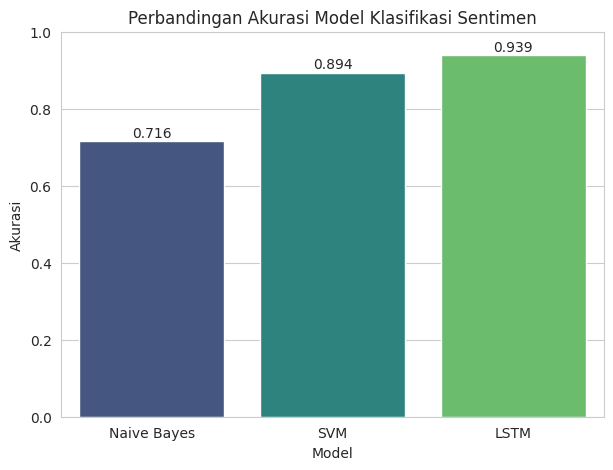

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(
    data=accuracy_df,
    x='Model',
    y='Accuracy',
    palette='viridis' # Changed palette
)

plt.ylim(0,1)
plt.title('Perbandingan Akurasi Model Klasifikasi Sentimen')
plt.ylabel('Akurasi')
plt.xlabel('Model')

# Tampilkan nilai di atas bar
for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01,
             f"{row['Accuracy']:.3f}",
             ha='center')

plt.show()

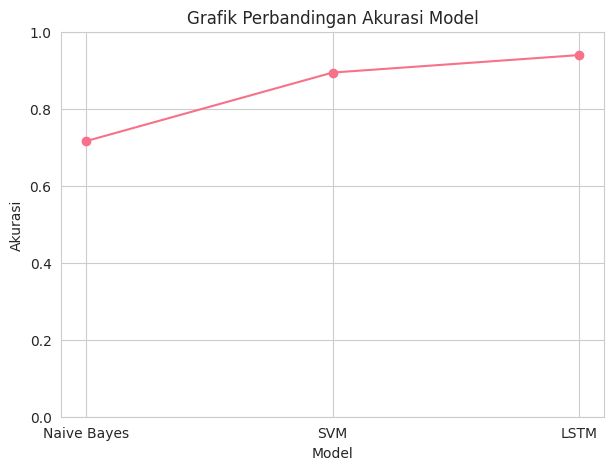

In [97]:
plt.figure(figsize=(7,5))
plt.plot(
    accuracy_df['Model'],
    accuracy_df['Accuracy'],
    marker='o'
)

plt.ylim(0,1)
plt.title('Grafik Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()


In [98]:
# Label asli
y_test        # untuk NB & SVM
y_test_label  # untuk LSTM (jika beda variabel)

# Prediksi model
y_pred_nb
y_pred_svm
y_pred_lstm_label


array([2, 2, 1, ..., 2, 1, 2])

In [99]:
def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["Negatif", "Netral", "Positif"]
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(title)
    plt.show()


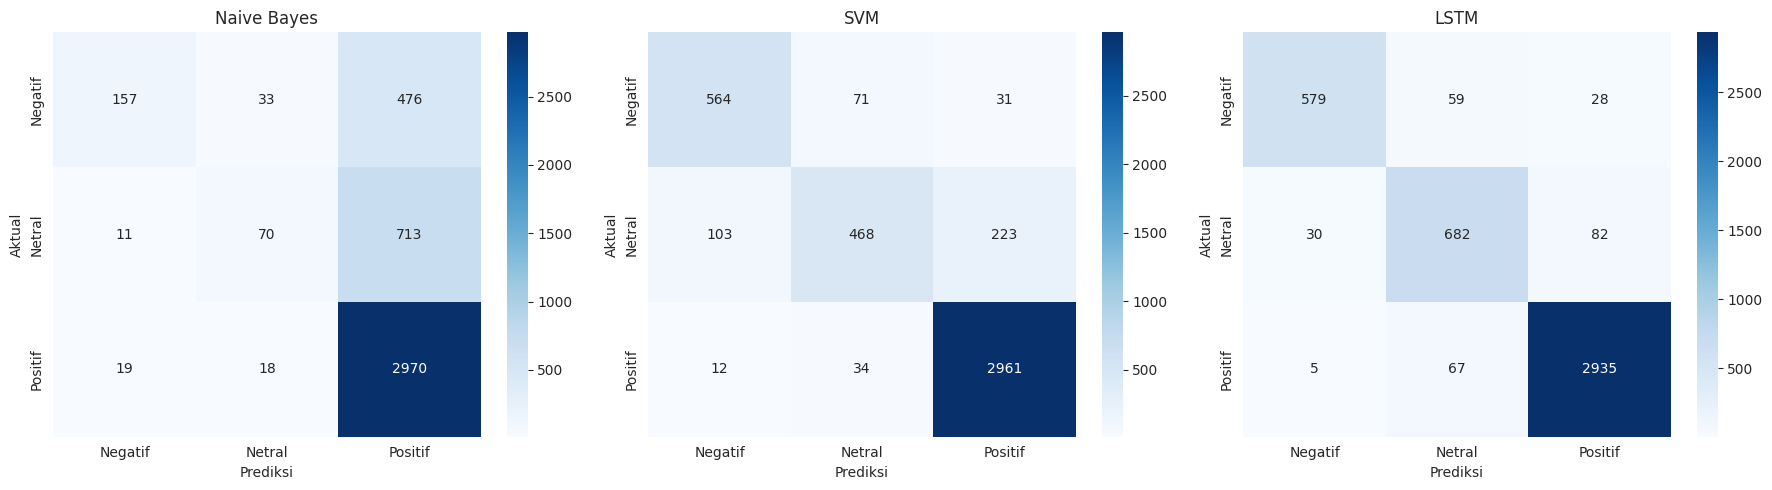

In [100]:
import numpy as np

# Original labels (strings) for display in the heatmap
display_labels = ["Negatif", "Netral", "Positif"]

# Numerical labels for the confusion_matrix function
numerical_labels_cm = [0, 1, 2] # Assuming Negatif=0, Netral=1, Positif=2 as per label_map

# Ensure y_pred_nb and y_pred_svm are numerical
# y_pred_nb is an array of strings, y_pred_svm is an array of strings
# Use the existing label_map to convert them
y_pred_nb_numerical = np.array([label_map[label] for label in y_pred_nb])
y_pred_svm_numerical = np.array([label_map[label] for label in y_pred_svm])

# The actual values y_test_enc are already numerical (from y_test.map(label_map))
# The actual values y_test_label for LSTM are already numerical

models = [
    ("Naive Bayes", y_test_enc, y_pred_nb_numerical),
    ("SVM", y_test_enc, y_pred_svm_numerical),
    ("LSTM", y_test_label, y_pred_lstm_label)
]

fig, axes = plt.subplots(1, 3, figsize=(18,5)) # Increased figsize for better visibility

for i, (title, y_true, y_pred) in enumerate(models):
    # Use numerical_labels_cm for confusion_matrix
    cm = confusion_matrix(y_true, y_pred, labels=numerical_labels_cm)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=display_labels, # Use string labels for display
        yticklabels=display_labels, # Use string labels for display
        ax=axes[i]
    )
    axes[i].set_title(title)
    axes[i].set_xlabel("Prediksi")
    axes[i].set_ylabel("Aktual")

plt.tight_layout()
plt.show()